In [1]:
from sympy import *
import spb

init_printing()

k, k_s, f, m, w, delta, xi = symbols('k k_s f m omega delta xi', real=True)

AH = f/sqrt(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2)
AV = f/sqrt(4*k_s*m*w**2*xi**2 + (k_s - m*w**2)**2)
phiHp = Piecewise((-atan(k_s*tan(delta)/(k_s - m*w**2)), atan(k_s*tan(delta)/(k_s - m*w**2)) >= 0), (-atan(k_s*tan(delta)/(k_s - m*w**2)) - pi, True))
phiV = arg(1/(2*I*sqrt(k_s)*sqrt(m)*w*xi + k_s - m*w**2))

In [2]:
# w2 = symbols("w", positive=True)
mydict = {f:1, m:3, k_s:2}

A_H = Lambda(w, AH.subs(mydict).simplify())
A_V = Lambda(w, AV.subs(mydict).simplify())
phi_H = Lambda(w, phiHp.subs(mydict).simplify())
phi_V = Lambda(w, phiV.subs(mydict).simplify())

In [3]:
# Bestem w_r for de to systemer:
w_n = 0
w_d = 0
w_r = solve(diff(A_H(w), w), w)[-1]

w_n2 = sqrt(k / m).subs(mydict)
w_d2 = (w_n2 * sqrt(1 - xi**2)).subs(mydict)
w_r2 = solve(diff(A_V(w), w), w)[-1]

display((w_r, w_r2))
# Hvis man ser bort fra det toppunkt der teknisks set er ved w = 0, så er der ikke altid et toppunkt for w_r i hverken system.

Værdierne for phi og phi_v ved ræsonans:


⎛⎧  ╱-π   π╲        ╱-π   π╲                                  ⎞
⎜⎪  │───, ─│    for │───, ─│ ≤ 0                              ⎟
⎜⎪  ╲ 2   2╱        ╲ 2   2╱         ⎛           1           ⎞⎟
⎜⎨                              , arg⎜───────────────────────⎟⎟
⎜⎪╱-π   π╲                           ⎜  ⎛         __________⎞⎟⎟
⎜⎪│───, ─│ - π     otherwise         ⎜  ⎜        ╱        2 ⎟⎟⎟
⎝⎩╲ 2   2╱                           ⎝ξ⋅⎝ξ + ⅈ⋅╲╱  1 - 2⋅ξ  ⎠⎠⎠

Værdierne for A og A_v ved ræsonans:


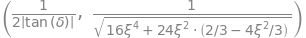

In [4]:
print("Værdierne for phi og phi_v ved ræsonans:")
display((phi_H(w_r).subs(delta, pi/5), phi_V(w_r2)))
print("Værdierne for A og A_v ved ræsonans:")
display((A_H(w_r), A_V(w_r2)))

In [5]:
sols = solve(Eq(A_H(w_r), A_V(w_r2)), delta)
sols

⎡⎧     ⎛     ________    ⎞         ________          ⎧    ⎛     ________    ⎞ 
⎢⎪     ⎜    ╱      2     ⎟        ╱      2           ⎪    ⎜    ╱      2     ⎟ 
⎢⎨-atan⎝2⋅╲╱  1 - ξ  ⋅│ξ│⎠  for ╲╱  1 - ξ  ⋅│ξ│ > 0, ⎨atan⎝2⋅╲╱  1 - ξ  ⋅│ξ│⎠ 
⎢⎪                                                   ⎪                        
⎣⎩          nan                    otherwise         ⎩          nan           

        ________        ⎤
       ╱      2         ⎥
 for ╲╱  1 - ξ  ⋅│ξ│ ≥ 0⎥
                        ⎥
        otherwise       ⎦

In [6]:
solve(sqrt(1 - xi**2) * abs(xi) >= 0, xi)

In [7]:
solve(1-2*xi**2 < 0, xi)

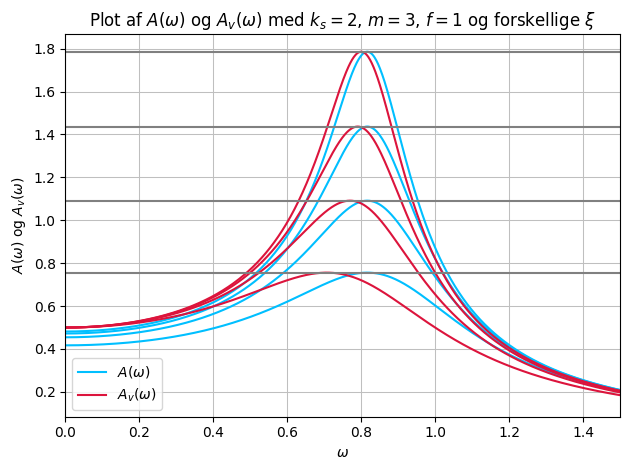

In [8]:
delta2xi = Lambda(xi, sols[1].args[0][0])
# display(re(w_r2).subs(xi, xi_val).evalf(5))

xi_list = [sqrt(2)/4, sqrt(2)/6, sqrt(2)/8, sqrt(2)/10]
p1 = spb.plot(*[A_H(w).subs(delta, delta2xi(xi_val)) for xi_val in xi_list], (w, 0, pi/2), label=["$A(\omega)$"]+[""]*3, rendering_kw={"color":"deepskyblue"}, show=False)
p2 = spb.plot(*[A_V(w).subs(xi, xi_val)            for xi_val in xi_list], (w, 0, pi/2), label=["$A_v(\omega)$"]+[""]*3, rendering_kw={"color":"crimson"}, show=False)
p_samlet = p1 + p2 + sum([spb.plot(A_V(w_r2).subs(xi, xi_), (w, 0, pi/2), rendering_kw={"color":"grey"}, label="", show=False) for xi_ in xi_list])
p_samlet.title = "Plot af $A(\omega)$ og $A_v(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og forskellige $\\xi$"
p_samlet.xlabel = "$\omega$"
p_samlet.ylabel = "$A(\omega)$ og $A_v(\omega)$"
p_samlet.xlim = (0, 1.5)
p_samlet.show()

In [10]:
w_n2, w_d2